<center><Bold><font size ='+2'> FRAUD DETECTION </Bold></center></font>


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve,roc_curve, accuracy_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.gridspec as gridspec
from sklearn import tree
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
#infor about data
df.info()

In [0]:
# check if there is any null values
df.isnull().sum() 

In [0]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

In [0]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

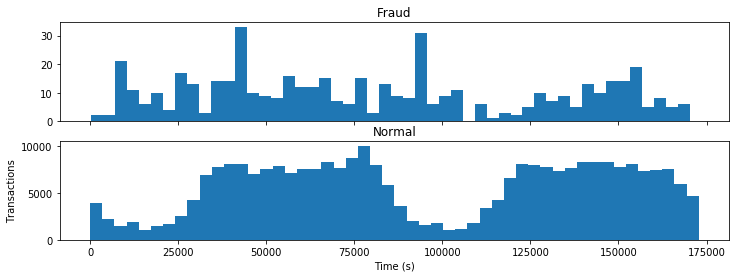

In [0]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('Normal')
plt.xlabel('Time (s)')
plt.ylabel('Transactions')
plt.show()

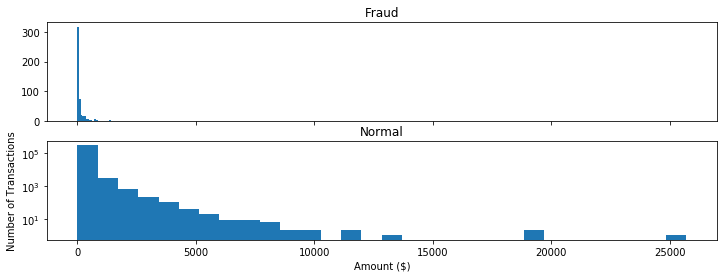

In [0]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(df.Amount[df.Class == 1], bins = 30)
ax1.set_title('Fraud')
ax2.hist(df.Amount[df.Class == 0], bins = 30)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

The graph above shows the imbalanaced state of the dataset. It can be seen that there are very less frauds present a compared to the normal transactions.

In [0]:
# print(train_features_T.duplicated().sum())  

In [0]:
import seaborn as sns
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(df['V'+str(i)][df.Class == 1], bins=50)
    sns.distplot(df['V'+str(i)][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

In [4]:
# Removing time since it is relatively redundant
df= df.drop(['Time'], axis =1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [5]:
X = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


<center><Bold><font size ='+2'> SPLITTING DATA </Bold></center></font>

In [6]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

#splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print(np.unique(y_train, return_counts=True))
np.unique(y_test, return_counts=True)





Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)
(array([0, 1]), array([199019,    345]))


(array([0, 1]), array([85296,   147]))

<center><Bold><font size ='+2'> SVM ON IMBALANCED DATA</Bold></center></font>

In [31]:
#hyperparameter search
lsvm = svm.LinearSVC(C=1.0, dual=False)
param_dist = {'C':[0.01,0.1,1,2,3,4,5,7,10,20]}
rand = RandomizedSearchCV(lsvm, param_dist, cv=5, scoring='f1', n_iter=20, random_state=5)
# fit
rand.fit(X_train, y_train.ravel())
rand.best_score_
rand.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'C': 1}

In [84]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train, y_train.ravel())
y_pred_im_svm = lsvm.predict(X_test)
print (sv)
accuracy_im_svm=accuracy_score(y_test, y_pred_im_svm)
print(accuracy_im_svm)


print('Confusion Matrix for SVM on Unbalanced Data')
print(confusion_matrix(y_test, y_pred_im_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_im_svm))
print(classification_report(y_test, y_pred_im_svm))

# plot_confusion_matrix(y_test, y_pred)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.99916903666772
Confusion Matrix for SVM on Unbalanced Data
[[85284    12]
 [   59    88]]
Accuracy: 0.99916903666772
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.60      0.71       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING NAIVE BAYES ALGORITHM ON IMBALANCED DATA</Bold></center></font>

In [85]:
classifier = GaussianNB()
model=classifier.fit(X_train, y_train.ravel())
y_pred_im_nb = model.predict(X_test)
accuracy_im_nb=accuracy_score(y_test, y_pred_im_nb)
print(accuracy_im_nb)
print (model)

print('Confusion Matrix for Naive Bayes on Unbalanced Data')
print(confusion_matrix(y_test, y_pred_im_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_im_nb))
print(classification_report(y_test, y_pred_im_nb))

0.9784066570696254
GaussianNB(priors=None, var_smoothing=1e-09)
Confusion Matrix for Naive Bayes on Unbalanced Data
[[83475  1821]
 [   24   123]]
Accuracy: 0.9784066570696254
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



<center><Bold><font size ='+2'>APPLYING RANDOM FOREST ON IMBALANCED DATA</Bold></center></font>

In [35]:
#hyperparameter search
rf = RandomForestClassifier(n_estimators=10)
param_dist = {'n_estimators':[5,7,10,15,20,25]}
rand = RandomizedSearchCV(rf, param_dist, cv=5, scoring='f1', n_iter=10, random_state=5)
# fit
rand.fit(X_train, y_train.ravel())
print(rand.best_score_)
print(rand.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 25}

In [86]:
rf = RandomForestClassifier(n_estimators=25, n_jobs=4)
rfmod=rf.fit(X_train, y_train.ravel())
y_pred_im_rf = rf.predict(X_test)
accuracy_im_rf=accuracy_score(y_test, y_pred_im_rf)
print(accuracy_im_rf)

# plot_confusion_matrix(y_test, y_pred)

0.9995084442259752


In [87]:
print('Confusion Matrix for Random Forest on Imbalanced Data')
print(confusion_matrix(y_test, y_pred_im_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_im_rf))
print(classification_report(y_test, y_pred_im_rf))

Confusion Matrix for Random Forest on Imbalanced Data
[[85290     6]
 [   36   111]]
Accuracy: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING DECISION TREE TO IMBALANCED DATA</Bold></center></font>

In [88]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train, y_train.ravel())
y_pred_im_dt = rf.predict(X_test)
accuracy_im_dt=accuracy_score(y_test, y_pred_im_dt)
print(accuracy_im_dt)
decisionTreeClf

0.9995084442259752


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
print('Confusion Matrix for Decision Tree on Imbalanced Data')
print(confusion_matrix(y_test, y_pred_im_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_im_dt))
print(classification_report(y_test, y_pred_im_dt))

Confusion Matrix for Decision Tree on Imbalanced Data
[[85290     6]
 [   36   111]]
Accuracy: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING NEURAL NETWORKS (MLP) TO IMBALANCED DATA</Bold></center></font>

In [10]:
#hyperparameter search
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8,7))  
param_dist = {'hidden_layer_sizes':[(5,5),(8,8),(10,10),(15,15),(20,20)], 'solver'
              :['lbfgs','sgd', 'adam'],'activation' : ['identity', 
               'logistic', 'tanh', 'relu'],'alpha': [0.0001, 0.05]}
rand = RandomizedSearchCV(mlp, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)
# fit
rand.fit(X_train, y_train.ravel())
print(rand.best_score_)
print(rand.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:743: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:743: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


0.999347926405971
{'solver': 'adam', 'hidden_layer_sizes': (15, 15), 'alpha': 0.0001, 'activation': 'tanh'}


In [11]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')  
mlp.fit(X_train, y_train.ravel())  
y_pred_im_mlp = mlp.predict(X_test)
accuracy_im_mlp= accuracy_score(y_test, y_pred_im_mlp)
print ('Accuracy of MLP:', accuracy_im_mlp)
mlp

Accuracy of MLP: 0.9993094811745842


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
print('Confusion Matrix for Neural Networks on Imbalanced Data')
print(confusion_matrix(y_test, y_pred_im_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_im_mlp))
print(classification_report(y_test, y_pred_im_mlp))

Confusion Matrix for Neural Networks on Imbalanced Data
[[85283    13]
 [   46   101]]
Accuracy: 0.9993094811745842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.69      0.77       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING LOGISTIC REGRESSION TO IMBALANCED DATASET</Bold></center></font>

In [13]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred_im_lr = clf.predict(X_test)
accuracy_im_lr = accuracy_score(y_test, y_pred_im_lr)
print ('Accuracy of LR:', accuracy_im_lr)
print(clf)

print('Confusion Matrix for Linear Regression on Imbalanced Data')
print(confusion_matrix(y_test, y_pred_im_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_im_lr))
print(classification_report(y_test, y_pred_im_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LR: 0.9991456292499094
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on Imbalanced Data
[[85279    17]
 [   56    91]]
Accuracy: 0.9991456292499094
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.62      0.71       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<center><Bold><font size ='+2'>APPLYING SMOTE TO GET 3 OVERSAMPLED DATASETS</Bold></center></font>

In [14]:
# Applying SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy=0.20,random_state=5,  k_neighbors=50, out_step=10)
X_train_smote1, y_train_smote1 = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote1.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote1.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote1==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote1==0)))                                                                   

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (238822, 29)
After OverSampling, the shape of train_y: (238822,) 

After OverSampling, counts of label '1': 39803
After OverSampling, counts of label '0': 199019


In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy=0.30, random_state=100,  k_neighbors=13, out_step=50)
X_train_smote2, y_train_smote2 = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote2.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote2==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (258724, 29)
After OverSampling, the shape of train_y: (258724,) 

After OverSampling, counts of label '1': 59705
After OverSampling, counts of label '0': 199019


In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy=0.50, random_state=100,  k_neighbors=13, out_step=30)
X_train_smote3, y_train_smote3 = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote3.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote3.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote3==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (298528, 29)
After OverSampling, the shape of train_y: (298528,) 

After OverSampling, counts of label '1': 99509
After OverSampling, counts of label '0': 199019


<center><Bold><font size ='+2'>APPLY SVM AFTER SMOTE</Bold></center></font>

In [17]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_smote1, y_train_smote1.ravel())
y_pred_s1_svm = lsvm.predict(X_test)
accuracy_s1_svm=accuracy_score(y_test, y_pred_s1_svm)
print(accuracy_s1_svm)
print (sv)

print('Confusion Matrix for SVM on SMOTE1 Dataset')
print(confusion_matrix(y_test, y_pred_s1_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s1_svm))
print(classification_report(y_test, y_pred_s1_svm))
# plot_confusion_matrix(y_test, y_pred)

0.9980688880306169
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on SMOTE1 Dataset
[[85154   142]
 [   23   124]]
Accuracy: 0.9980688880306169
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.47      0.84      0.60       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.73      0.92      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_smote2, y_train_smote2.ravel())
y_pred_s2_svm = lsvm.predict(X_test)
accuracy_s2_svm=accuracy_score(y_test, y_pred_s2_svm)
print(accuracy_s2_svm)
print (sv)

print('Confusion Matrix for SVM on SMOTE 2 Dataset')
print(confusion_matrix(y_test, y_pred_s2_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_svm))
print(classification_report(y_test, y_pred_s2_svm))
# plot_confusion_matrix(y_test, y_pred)

0.9949908125885093
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on SMOTE 2 Dataset
[[84887   409]
 [   19   128]]
Accuracy: 0.9949908125885093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.24      0.87      0.37       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.62      0.93      0.69     85443
weighted avg       1.00      0.99      1.00     85443



In [19]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_smote3, y_train_smote3.ravel())
y_pred_s3_svm = lsvm.predict(X_test)
accuracy_s3_svm=accuracy_score(y_test, y_pred_s3_svm)
print(accuracy_s3_svm)
print (sv)

print('Confusion Matrix for SVM on SMOTE 3 Dataset')
print(confusion_matrix(y_test, y_pred_s3_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s3_svm))
print(classification_report(y_test, y_pred_s3_svm))
# plot_confusion_matrix(y_test, y_pred)
cohen_kappa_score(y_test, y_pred_s3_svm)

0.9928373301499245
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on SMOTE 3 Dataset
[[84703   593]
 [   19   128]]
Accuracy: 0.9928373301499245
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.87      0.29       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.59      0.93      0.65     85443
weighted avg       1.00      0.99      1.00     85443



0.29290989965863246

<center><Bold><font size ='+2'>APPLY NAIVE BAYES AFTER SMOTE TO 3 DATASETS</Bold></center></font>

In [20]:
classifier = GaussianNB()
model=classifier.fit(X_train_smote1, y_train_smote1.ravel())
y_pred_s1_nb = model.predict(X_test)
accuracy_s1_nb=accuracy_score(y_test, y_pred_s1_nb)
print(accuracy_s1_nb)
model

0.9781491754737076


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
print('Confusion Matrix for Naive Bayes on SMOTE 1 Dataset')
print(confusion_matrix(y_test, y_pred_s1_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s1_nb))
print(classification_report(y_test, y_pred_s1_nb))
cohen_kappa_score(y_test, y_pred_s1_nb)

Confusion Matrix for Naive Bayes on SMOTE 1 Dataset
[[83450  1846]
 [   21   126]]
Accuracy: 0.9781491754737076
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.86      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



0.11609358644886747

In [22]:
classifier = GaussianNB()
model=classifier.fit(X_train_smote2, y_train_smote2.ravel())
y_pred_s2_nb = model.predict(X_test)
accuracy_s2_nb=accuracy_score(y_test, y_pred_s2_nb)
print(accuracy_s2_nb)
model

0.9761829523776084


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
print('Confusion Matrix for Naive Bayes on SMOTE 2 Dataset')
print(confusion_matrix(y_test, y_pred_s2_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_nb))
print(classification_report(y_test, y_pred_s2_nb))

Confusion Matrix for Naive Bayes on SMOTE 2 Dataset
[[83780  1516]
 [   20   127]]
Accuracy: 0.9820231031213792
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.86      0.14       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [23]:
classifier = GaussianNB()
model=classifier.fit(X_train_smote3, y_train_smote3.ravel())
y_pred_s3_nb = model.predict(X_test)
accuracy_s3_nb=accuracy_score(y_test, y_pred_s3_nb)
print(accuracy_s3_nb)
model

0.9757967299837318


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
print('Confusion Matrix for Naive Bayes on SMOTE 3 Dataset')
print(confusion_matrix(y_test, y_pred_s3_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s3_nb))
print(classification_report(y_test, y_pred_s3_nb))

Confusion Matrix for Naive Bayes on SMOTE 3 Dataset
[[83747  1549]
 [   20   127]]
Accuracy: 0.9816368807275025
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.86      0.14       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



<center><Bold><font size ='+2'>APPLYING RANDOM FOREST TO SMOTE 3 DATASETS</Bold></center></font>

In [25]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_smote1, y_train_smote1.ravel())
y_pred_s1_rf = rf.predict(X_test)
accuracy_s1_rf=accuracy_score(y_test, y_pred_s1_rf)
print(accuracy_s1_rf)
rfmod
# plot_confusion_matrix(y_test, y_pred)

0.9994382219725431


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print('Confusion Matrix for Random Forest on SMOTE 1 Dataset')
print(confusion_matrix(y_test, y_pred_s1_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s1_rf))
print(classification_report(y_test, y_pred_s1_rf))

Confusion Matrix for Random Forest on SMOTE 1 Dataset
[[85271    25]
 [   23   124]]
Accuracy: 0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.84      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [27]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_smote2, y_train_smote2.ravel())
y_pred_s2_rf = rf.predict(X_test)
accuracy_s2_rf=accuracy_score(y_test, y_pred_s2_rf)
print(accuracy_s2_rf)
rfmod
# plot_confusion_matrix(y_test, y_pred)

0.9994616293903538


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
print('Confusion Matrix for Random Forest on SMOTE 2 Dataset')
print(confusion_matrix(y_test, y_pred_s2_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_rf))
print(classification_report(y_test, y_pred_s2_rf))

Confusion Matrix for Random Forest on SMOTE 2 Dataset
[[85276    20]
 [   26   121]]
Accuracy: 0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.82      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_smote3, y_train_smote3.ravel())
y_pred_s3_rf = rf.predict(X_test)
accuracy_s3_rf=accuracy_score(y_test, y_pred_s3_rf)
print(accuracy_s3_rf)
rfmod
# plot_confusion_matrix(y_test, y_pred)

0.9994967405170698


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
print('Confusion Matrix for Random Forest on SMOTE 3 Dataset')
print(confusion_matrix(y_test, y_pred_s3_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s3_rf))
print(classification_report(y_test, y_pred_s3_rf))

Confusion Matrix for Random Forest on SMOTE 3 Dataset
[[85277    19]
 [   24   123]]
Accuracy: 0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.84      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING DECISION TREE TO 3 SMOTE DATASETS</Bold></center></font>

In [31]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_smote1, y_train_smote1.ravel())
y_pred_s1_dt = rf.predict(X_test)
accuracy_s1_dt=accuracy_score(y_test, y_pred_s1_dt)
print(accuracy_s1_dt)
decisionTreeClf

0.9994967405170698


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
print('Confusion Matrix for Decision Tree on SMOTE 1 Dataset')
print(confusion_matrix(y_test, y_pred_s1_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s1_dt))
print(classification_report(y_test, y_pred_s1_dt))

Confusion Matrix for Decision Tree on SMOTE 1 Dataset
[[85277    19]
 [   24   123]]
Accuracy: 0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.84      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [33]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_smote2, y_train_smote2.ravel())
y_pred_s2_dt = rf.predict(X_test)
accuracy_s2_dt=accuracy_score(y_test, y_pred_s2_dt)
print(accuracy_s2_dt)
decisionTreeClf

0.9994967405170698


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
print('Confusion Matrix for Decision Tree on SMOTE 2 Dataset')
print(confusion_matrix(y_test, y_pred_s2_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_dt))
print(classification_report(y_test, y_pred_s2_dt))

Confusion Matrix for Decision Tree on SMOTE 2 Dataset
[[85277    19]
 [   24   123]]
Accuracy: 0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.84      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_smote3, y_train_smote3.ravel())
y_pred_s3_dt = rf.predict(X_test)
accuracy_s3_dt=accuracy_score(y_test, y_pred_s3_dt)
print(accuracy_s3_dt)
decisionTreeClf

0.9994967405170698


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
print('Confusion Matrix for Decision Tree on SMOTE 2 Dataset')
print(confusion_matrix(y_test, y_pred_s2_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_dt))
print(classification_report(y_test, y_pred_s2_dt))

Confusion Matrix for Decision Tree on SMOTE 2 Dataset
[[85277    19]
 [   24   123]]
Accuracy: 0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.84      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING NEURAL NETWORKS (MLP) TO 3 SMOTE DATASETS</Bold></center></font>

In [37]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')  
mlp.fit(X_train_smote1, y_train_smote1.ravel())  
y_pred_s1_mlp = mlp.predict(X_test)
accuracy_s1_mlp= accuracy_score(y_test, y_pred_s1_mlp)
print ('Accuracy of MLP:', accuracy_s1_mlp)
mlp

Accuracy of MLP: 0.9970506653558513


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
print('Confusion Matrix for Neural Networks on SMOTE 1 Dataset')
print(confusion_matrix(y_test, y_pred_s1_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s1_mlp))
print(classification_report(y_test, y_pred_s1_mlp))

Confusion Matrix for Neural Networks on SMOTE 1 Dataset
[[85065   231]
 [   21   126]]
Accuracy: 0.9970506653558513
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.35      0.86      0.50       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.68      0.93      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')  
mlp.fit(X_train_smote2, y_train_smote2.ravel())  
y_pred_s2_mlp = mlp.predict(X_test)
accuracy_s2_mlp= accuracy_score(y_test, y_pred_s2_mlp)
print ('Accuracy of MLP:', accuracy_s2_mlp)
mlp

Accuracy of MLP: 0.9985019252601149


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
print('Confusion Matrix for Neural Networks on SMOTE 2 Dataset')
print(confusion_matrix(y_test, y_pred_s2_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_mlp))
print(classification_report(y_test, y_pred_s2_mlp))

Confusion Matrix for Neural Networks on SMOTE 2 Dataset
[[85195   101]
 [   27   120]]
Accuracy: 0.9985019252601149
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.54      0.82      0.65       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.77      0.91      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh') 
mlp.fit(X_train_smote3, y_train_smote3.ravel())  
y_pred_s3_mlp = mlp.predict(X_test)
accuracy_s3_mlp= accuracy_score(y_test, y_pred_s3_mlp)
print ('Accuracy of MLP:', accuracy_s3_mlp)
mlp

Accuracy of MLP: 0.9974602951675386


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [42]:
print('Confusion Matrix for Neural Networks on SMOTE 3 Dataset')
print(confusion_matrix(y_test, y_pred_s3_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s3_mlp))
print(classification_report(y_test, y_pred_s3_mlp))

Confusion Matrix for Neural Networks on SMOTE 3 Dataset
[[85105   191]
 [   26   121]]
Accuracy: 0.9974602951675386
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.39      0.82      0.53       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.69      0.91      0.76     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING LOGISTIC REGRESSION ON 3 DATASETS OF SMOTE</Bold></center></font>

In [43]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_smote1, y_train_smote1)
y_pred_s1_lr = clf.predict(X_test)
accuracy_s1_lr = accuracy_score(y_test, y_pred_s1_lr)
print ('Accuracy of SMOTE1:', accuracy_s1_lr)
print(clf)

print('Confusion Matrix for Linear Regression on SMOTE1')
print(confusion_matrix(y_test, y_pred_s1_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s1_lr))
print(classification_report(y_test, y_pred_s1_lr))

Accuracy of SMOTE1: 0.9971325913181888
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on SMOTE1
[[85072   224]
 [   21   126]]
Accuracy: 0.9971325913181888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.36      0.86      0.51       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.68      0.93      0.75     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [44]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_smote2, y_train_smote2)
y_pred_s2_lr = clf.predict(X_test)
accuracy_s2_lr = accuracy_score(y_test, y_pred_s2_lr)
print ('Accuracy of LR for SMOTE 2:', accuracy_s2_lr)
print(clf)

print('Confusion Matrix for Linear Regression on SMOTE2 Data')
print(confusion_matrix(y_test, y_pred_s2_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s2_lr))
print(classification_report(y_test, y_pred_s2_lr))

Accuracy of LR for SMOTE 2: 0.9944290345610524
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on SMOTE2 Data
[[84840   456]
 [   20   127]]
Accuracy: 0.9944290345610524
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.22      0.86      0.35       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.61      0.93      0.67     85443
weighted avg       1.00      0.99      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [45]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_smote3, y_train_smote3)
y_pred_s3_lr = clf.predict(X_test)
accuracy_s3_lr = accuracy_score(y_test, y_pred_s3_lr)
print ('Accuracy of LR for SMOTE 3:', accuracy_s3_lr)
print(clf)

print('Confusion Matrix for Linear Regression on SMOTE3 Data')
print(confusion_matrix(y_test, y_pred_s3_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_s3_lr))
print(classification_report(y_test, y_pred_s3_lr))

Accuracy of LR for SMOTE 3: 0.9928373301499245
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on SMOTE3 Data
[[84702   594]
 [   18   129]]
Accuracy: 0.9928373301499245
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.88      0.30       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.59      0.94      0.65     85443
weighted avg       1.00      0.99      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<center><Bold><font size ='+2'>APPLYING 3 ADASYN DATASETS</Bold></center></font>

In [46]:
ada = ADASYN(sampling_strategy=0.20, random_state=42)
X_train_ada1, y_train_ada1 = ada.fit_sample(X_train, y_train.ravel())
# X_res, y_res = ada.fit_resample(X_ada, y_ada)
# print('Resampled dataset shape %s' % Counter(y_res))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ada1.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ada1.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ada1==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ada1==0)))


After OverSampling, the shape of train_X: (238801, 29)
After OverSampling, the shape of train_y: (238801,) 

After OverSampling, counts of label '1': 39782
After OverSampling, counts of label '0': 199019


In [47]:
ada = ADASYN(sampling_strategy= 0.35, random_state=30)
X_train_ada2, y_train_ada2 = ada.fit_sample(X_train, y_train.ravel())
# X_res, y_res = ada.fit_resample(X_ada, y_ada)
# print('Resampled dataset shape %s' % Counter(y_res))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ada2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ada2.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ada2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ada2==0)))

After OverSampling, the shape of train_X: (268687, 29)
After OverSampling, the shape of train_y: (268687,) 

After OverSampling, counts of label '1': 69668
After OverSampling, counts of label '0': 199019


In [48]:
ada = ADASYN(sampling_strategy=0.50, random_state=10)
X_train_ada3, y_train_ada3 = ada.fit_sample(X_train, y_train.ravel())
# X_res, y_res = ada.fit_resample(X_ada, y_ada)
# print('Resampled dataset shape %s' % Counter(y_res))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ada3.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ada3.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ada3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ada3==0)))

After OverSampling, the shape of train_X: (298515, 29)
After OverSampling, the shape of train_y: (298515,) 

After OverSampling, counts of label '1': 99496
After OverSampling, counts of label '0': 199019


<center><Bold><font size ='+2'>APPLYING SVM AFTER ADASYN TO 3 DATASETS</Bold></center></font>

In [49]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_ada1, y_train_ada1.ravel())
y_pred_ada1_svm = lsvm.predict(X_test)
accuracy_ada1_svm=accuracy_score(y_test, y_pred_ada1_svm)
print(accuracy_ada1_svm)
sv

0.9930362932013155


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [50]:
print('Confusion Matrix for SVM on ADASYN 1 Dataset')
print(confusion_matrix(y_test, y_pred_ada1_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada1_svm))
print(classification_report(y_test, y_pred_ada1_svm))

Confusion Matrix for SVM on ADASYN 1 Dataset
[[84721   575]
 [   20   127]]
Accuracy: 0.9930362932013155
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.86      0.30       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.59      0.93      0.65     85443
weighted avg       1.00      0.99      1.00     85443



In [51]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_ada2, y_train_ada2.ravel())
y_pred_ada2_svm = lsvm.predict(X_test)
accuracy_ada2_svm=accuracy_score(y_test, y_pred_ada2_svm)
print(accuracy_ada2_svm)
sv

0.9874302166356519


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
print('Confusion Matrix for SVM on ADASYN 2 Dataset')
print(confusion_matrix(y_test, y_pred_ada2_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada2_svm))
print(classification_report(y_test, y_pred_ada2_svm))

Confusion Matrix for SVM on ADASYN 2 Dataset
[[84241  1055]
 [   19   128]]
Accuracy: 0.9874302166356519
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.11      0.87      0.19       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.55      0.93      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [54]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_ada3, y_train_ada3.ravel())
y_pred_ada3_svm = lsvm.predict(X_test)
accuracy_ada3_svm=accuracy_score(y_test, y_pred_ada3_svm)
print(accuracy_ada3_svm)
sv

0.982315695844013


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
print('Confusion Matrix for SVM on ADASYN 3 Dataset')
print(confusion_matrix(y_test, y_pred_ada3_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada3_svm))
print(classification_report(y_test, y_pred_ada3_svm))

Confusion Matrix for SVM on ADASYN 3 Dataset
[[83802  1494]
 [   17   130]]
Accuracy: 0.982315695844013
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.88      0.15       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



<center><Bold><font size ='+2'>APPLYING NAIVE BAYES AFTER ADASYN TO 3 DATASETS</Bold></center></font>

In [56]:
classifier = GaussianNB()
model=classifier.fit(X_train_ada1, y_train_ada1.ravel())
y_pred_ada1_nb = model.predict(X_test)
accuracy_ada1_nb=accuracy_score(y_test, y_pred_ada1_nb)
print(accuracy_ada1_nb)
model

0.9659070959587093


GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
print('Confusion Matrix for Gaussian NB on ADASYN 1 Dataset')
print(confusion_matrix(y_test, y_pred_ada1_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada1_nb))
print(classification_report(y_test, y_pred_ada1_nb))

Confusion Matrix for Gaussian NB on ADASYN 1 Dataset
[[82402  2894]
 [   19   128]]
Accuracy: 0.9659070959587093
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.87      0.08       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



In [58]:
classifier = GaussianNB()
model=classifier.fit(X_train_ada2, y_train_ada2.ravel())
y_pred_ada2_nb = model.predict(X_test)
accuracy_ada2_nb=accuracy_score(y_test, y_pred_ada2_nb)
print(accuracy_ada2_nb)
model

0.9647133176503634


GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
print('Confusion Matrix for Gaussian NB on ADASYN 2 Dataset')
print(confusion_matrix(y_test, y_pred_ada2_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada2_nb))
print(classification_report(y_test, y_pred_ada2_nb))

Confusion Matrix for Gaussian NB on ADASYN 2 Dataset
[[82300  2996]
 [   19   128]]
Accuracy: 0.9647133176503634
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.87      0.08       147

   micro avg       0.96      0.96      0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [60]:
classifier = GaussianNB()
model=classifier.fit(X_train_ada3, y_train_ada3.ravel())
y_pred_ada3_nb = model.predict(X_test)
accuracy_ada3_nb=accuracy_score(y_test, y_pred_ada3_nb)
print(accuracy_ada3_nb)
model

0.964069613660569


GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
print('Confusion Matrix for Gaussian NB on ADASYN 3 Dataset')
print(confusion_matrix(y_test, y_pred_ada3_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada3_nb))
print(classification_report(y_test, y_pred_ada3_nb))

Confusion Matrix for Gaussian NB on ADASYN 3 Dataset
[[82245  3051]
 [   19   128]]
Accuracy: 0.964069613660569
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.87      0.08       147

   micro avg       0.96      0.96      0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443



<center><Bold><font size ='+2'>APPLY RANDOM FOREST TO THE 3 ADASYN DATASETS</Bold></center></font>

In [62]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_ada1, y_train_ada1.ravel())
y_pred_ada1_rf = rf.predict(X_test)
accuracy_ada1_rf=accuracy_score(y_test, y_pred_ada1_rf)
print(accuracy_ada1_rf)

0.9994499256814484


In [63]:
print('Confusion Matrix for Random Forest on ADASYN 1 Dataset')
print(confusion_matrix(y_test, y_pred_ada1_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada1_rf))
print(classification_report(y_test, y_pred_ada1_rf))

Confusion Matrix for Random Forest on ADASYN 1 Dataset
[[85277    19]
 [   28   119]]
Accuracy: 0.9994499256814484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.81      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [64]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_ada2, y_train_ada2.ravel())
y_pred_ada2_rf = rf.predict(X_test)
accuracy_ada2_rf=accuracy_score(y_test, y_pred_ada2_rf)
print(accuracy_ada2_rf)
rfmod
# plot_confusion_matrix(y_test, y_pred)

0.9994967405170698


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
print('Confusion Matrix for Random Forest on ADASYN 2 Dataset')
print(confusion_matrix(y_test, y_pred_ada2_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada2_rf))
print(classification_report(y_test, y_pred_ada2_rf))

Confusion Matrix for Random Forest on ADASYN 2 Dataset
[[85280    16]
 [   27   120]]
Accuracy: 0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.82      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [66]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_ada3, y_train_ada3.ravel())
y_pred_ada3_rf = rf.predict(X_test)
accuracy_ada3_rf=accuracy_score(y_test, y_pred_ada3_rf)
print(accuracy_ada3_rf)
rfmod
# plot_confusion_matrix(y_test, y_pred)

0.9994850368081645


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
print('Confusion Matrix for Random Forest on ADASYN 3 Dataset')
print(confusion_matrix(y_test, y_pred_ada3_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada3_rf))
print(classification_report(y_test, y_pred_ada3_rf))

Confusion Matrix for Random Forest on ADASYN 3 Dataset
[[85280    16]
 [   28   119]]
Accuracy: 0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.81      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING DECISION TREE TO 3 ADASYN DATASETS</Bold></center></font>

In [68]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_ada1, y_train_ada1.ravel())
y_pred_ada1_dt = rf.predict(X_test)
accuracy_ada1_dt=accuracy_score(y_test, y_pred_ada1_dt)
print(accuracy_ada1_dt)
decisionTreeClf

0.9994850368081645


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
print('Confusion Matrix for Decision Tree on ADASYN 1 Dataset')
print(confusion_matrix(y_test, y_pred_ada1_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada1_dt))
print(classification_report(y_test, y_pred_ada1_dt))

Confusion Matrix for Decision Tree on ADASYN 1 Dataset
[[85280    16]
 [   28   119]]
Accuracy: 0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.81      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_ada2, y_train_ada2.ravel())
y_pred_ada2_dt = rf.predict(X_test)
accuracy_ada2_dt=accuracy_score(y_test, y_pred_ada2_dt)
print(accuracy_ada2_dt)
decisionTreeClf

In [70]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_ada2, y_train_ada2.ravel())
y_pred_ada2_dt = rf.predict(X_test)
accuracy_ada2_dt=accuracy_score(y_test, y_pred_ada2_dt)
print(accuracy_ada2_dt)
decisionTreeClf

0.9994850368081645


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
print('Confusion Matrix for Decision Tree on ADASYN 2 Dataset')
print(confusion_matrix(y_test, y_pred_ada2_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada2_dt))
print(classification_report(y_test, y_pred_ada2_dt))

Confusion Matrix for Decision Tree on ADASYN 2 Dataset
[[85280    16]
 [   28   119]]
Accuracy: 0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.81      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [72]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_ada3, y_train_ada3.ravel())
y_pred_ada3_dt = rf.predict(X_test)
accuracy_ada3_dt=accuracy_score(y_test, y_pred_ada3_dt)
print(accuracy_ada3_dt)
decisionTreeClf

0.9994850368081645


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
print('Confusion Matrix for Decision Tree on ADASYN 3 Dataset')
print(confusion_matrix(y_test, y_pred_ada3_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada3_dt))
print(classification_report(y_test, y_pred_ada3_dt))

Confusion Matrix for Decision Tree on ADASYN 3 Dataset
[[85280    16]
 [   28   119]]
Accuracy: 0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.81      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING NEURAL NETWORKS (MLP) TO 3 ADASYN DATASETS</Bold></center></font>

In [74]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')  
mlp.fit(X_train_ada1, y_train_ada1.ravel())  
y_pred_ada1_mlp = mlp.predict(X_test)
accuracy_ada1_mlp= accuracy_score(y_test, y_pred_ada1_mlp)
print ('Accuracy of MLP:', accuracy_ada1_mlp)
mlp

Accuracy of MLP: 0.9980103694860901


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [75]:
print('Confusion Matrix for Neural Network (MLP) on ADASYN 1 Dataset')
print(confusion_matrix(y_test, y_pred_ada1_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada1_mlp))
print(classification_report(y_test, y_pred_ada1_mlp))

Confusion Matrix for Neural Network (MLP) on ADASYN 1 Dataset
[[85150   146]
 [   24   123]]
Accuracy: 0.9980103694860901
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.46      0.84      0.59       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.73      0.92      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [76]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh') 
mlp.fit(X_train_ada2, y_train_ada2.ravel())  
y_pred_ada2_mlp = mlp.predict(X_test)
accuracy_ada2_mlp= accuracy_score(y_test, y_pred_ada2_mlp)
print ('Accuracy of MLP:', accuracy_ada2_mlp)
mlp

Accuracy of MLP: 0.9978465175614152


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
print('Confusion Matrix for Neural Network (MLP) on ADASYN 2 Dataset')
print(confusion_matrix(y_test, y_pred_ada2_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada2_mlp))
print(classification_report(y_test, y_pred_ada2_mlp))

Confusion Matrix for Neural Network (MLP) on ADASYN 2 Dataset
[[85141   155]
 [   29   118]]
Accuracy: 0.9978465175614152
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.43      0.80      0.56       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.72      0.90      0.78     85443
weighted avg       1.00      1.00      1.00     85443



In [78]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')
mlp.fit(X_train_ada3, y_train_ada3.ravel())  
y_pred_ada3_mlp = mlp.predict(X_test)
accuracy_ada3_mlp= accuracy_score(y_test, y_pred_ada3_mlp)
print ('Accuracy of MLP:', accuracy_ada3_mlp)
mlp

Accuracy of MLP: 0.9968868134311764


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [79]:
print('Confusion Matrix for Neural Network (MLP) on ADASYN 3 Dataset')
print(confusion_matrix(y_test, y_pred_ada3_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ada3_mlp))
print(classification_report(y_test, y_pred_ada3_mlp))

Confusion Matrix for Neural Network (MLP) on ADASYN 3 Dataset
[[85060   236]
 [   30   117]]
Accuracy: 0.9968868134311764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.33      0.80      0.47       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.67      0.90      0.73     85443
weighted avg       1.00      1.00      1.00     85443



<center><Bold><font size ='+2'>APPLYING LOGISTIC REGRESSION ON 3 ADASYN DATASETS</Bold></center></font>

In [80]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_ada1, y_train_ada1)
y_pred_a1_lr = clf.predict(X_test)
accuracy_a1_lr = accuracy_score(y_test, y_pred_a1_lr)
print ('Accuracy of LR for ADASYN 1:', accuracy_a1_lr)
print(clf)

print('Confusion Matrix for Linear Regression on ADASYN 1 Data')
print(confusion_matrix(y_test, y_pred_a1_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_a1_lr))
print(classification_report(y_test, y_pred_a1_lr))

Accuracy of LR for ADASYN 1: 0.9919478482731178
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on ADASYN 1 Data
[[84627   669]
 [   19   128]]
Accuracy: 0.9919478482731178
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.87      0.27       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.93      0.63     85443
weighted avg       1.00      0.99      0.99     85443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [81]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_ada2, y_train_ada2)
y_pred_a2_lr = clf.predict(X_test)
accuracy_a2_lr = accuracy_score(y_test, y_pred_a2_lr)
print ('Accuracy of LR for ADASYN 2:', accuracy_a2_lr)
print(clf)

print('Confusion Matrix for Linear Regression on ADASYN 2 Data')
print(confusion_matrix(y_test, y_pred_a2_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_a2_lr))
print(classification_report(y_test, y_pred_a2_lr))

Accuracy of LR for ADASYN 2: 0.9851948082347296
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on ADASYN 2 Data
[[84048  1248]
 [   17   130]]
Accuracy: 0.9851948082347296
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.09      0.88      0.17       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.99      0.99     85443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [82]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_ada3, y_train_ada3)
y_pred_a3_lr = clf.predict(X_test)
accuracy_a3_lr = accuracy_score(y_test, y_pred_a3_lr)
print ('Accuracy of LR for ADASYN 3:', accuracy_a3_lr)
print(clf)

print('Confusion Matrix for Linear Regression on ADASYN 3 Data')
print(confusion_matrix(y_test, y_pred_a3_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_a3_lr))
print(classification_report(y_test, y_pred_a3_lr))

cohen_kappa_score(y_test, y_pred_a3_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy of LR for ADASYN 3: 0.9774469529393864
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on ADASYN 3 Data
[[83383  1913]
 [   14   133]]
Accuracy: 0.9774469529393864
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.90      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



0.11846508880539275

<center><Bold><font size ='+2'> COHEN KAPPA SCORES </Bold></center></font>

In [90]:
# Cohen Kappa Imbalanced
print ("cohen kappa score for imbalanced SVM:", cohen_kappa_score(y_test, y_pred_im_svm))
print ("cohen kappa score for imbalanced NB:", cohen_kappa_score(y_test, y_pred_im_nb))
print ("cohen kappa score for imbalanced RF:", cohen_kappa_score(y_test, y_pred_im_rf))
print ("cohen kappa score for imbalanced DT:", cohen_kappa_score(y_test, y_pred_im_dt))
print ("cohen kappa score for imbalanced MLP:", cohen_kappa_score(y_test, y_pred_im_mlp))
print ("cohen kappa score for imbalanced LR:", cohen_kappa_score(y_test, y_pred_im_lr))

# Cohen Kappa SMOTE1
print ("cohen kappa score for SMOTE 1 SVM:", cohen_kappa_score(y_test, y_pred_s1_svm))
print ("cohen kappa score for SMOTE 1 NB:", cohen_kappa_score(y_test, y_pred_s1_nb))
print ("cohen kappa score for SMOTE 1 RF:", cohen_kappa_score(y_test, y_pred_s1_rf))
print ("cohen kappa score for SMOTE 1 DT:", cohen_kappa_score(y_test, y_pred_s1_dt))
print ("cohen kappa score for SMOTE 1 MLP:", cohen_kappa_score(y_test, y_pred_s1_mlp))
print ("cohen kappa score for SMOTE 1 LR:", cohen_kappa_score(y_test, y_pred_s1_lr))

# Cohen Kappa SMOTE2
print ("cohen kappa score for SMOTE 2 SVM:", cohen_kappa_score(y_test, y_pred_s2_svm))
print ("cohen kappa score for SMOTE 2 NB:", cohen_kappa_score(y_test, y_pred_s2_nb))
print ("cohen kappa score for SMOTE 2 RF:", cohen_kappa_score(y_test, y_pred_s2_rf))
print ("cohen kappa score for SMOTE 2 DT:", cohen_kappa_score(y_test, y_pred_s2_dt))
print ("cohen kappa score for SMOTE 2 MLP:", cohen_kappa_score(y_test, y_pred_s2_mlp))
print ("cohen kappa score for SMOTE 2 LR:", cohen_kappa_score(y_test, y_pred_s2_lr))

# Cohen Kappa SMOTE3
print ("cohen kappa score for SMOTE 3 SVM:", cohen_kappa_score(y_test, y_pred_s3_svm))
print ("cohen kappa score for SMOTE 3 NB:", cohen_kappa_score(y_test, y_pred_s3_nb))
print ("cohen kappa score for SMOTE 3 RF:", cohen_kappa_score(y_test, y_pred_s3_rf))
print ("cohen kappa score for SMOTE 3 DT:", cohen_kappa_score(y_test, y_pred_s3_dt))
print ("cohen kappa score for SMOTE 3 MLP:", cohen_kappa_score(y_test, y_pred_s3_mlp))
print ("cohen kappa score for SMOTE 3 LR:", cohen_kappa_score(y_test, y_pred_s3_lr))

# Cohen Kappa ADASYN1
print ("cohen kappa score for ADASYN 1 SVM:", cohen_kappa_score(y_test, y_pred_ada1_svm))
print ("cohen kappa score for ADASYN 1 NB:", cohen_kappa_score(y_test, y_pred_ada1_nb))
print ("cohen kappa score for ADASYN 1 RF:", cohen_kappa_score(y_test, y_pred_ada1_rf))
print ("cohen kappa score for ADASYN 1 DT:", cohen_kappa_score(y_test, y_pred_ada1_dt))
print ("cohen kappa score for ADASYN 1 MLP:", cohen_kappa_score(y_test, y_pred_ada1_mlp))
print ("cohen kappa score for ADASYN 1 LR:", cohen_kappa_score(y_test, y_pred_a1_lr))

# Cohen Kappa ADASYN2
print ("cohen kappa score for ADASYN 2 SVM:", cohen_kappa_score(y_test, y_pred_ada2_svm))
print ("cohen kappa score for ADASYN 2 NB:", cohen_kappa_score(y_test, y_pred_ada2_nb))
print ("cohen kappa score for ADASYN 2 RF:", cohen_kappa_score(y_test, y_pred_ada2_rf))
print ("cohen kappa score for ADASYN 2 DT:", cohen_kappa_score(y_test, y_pred_ada2_dt))
print ("cohen kappa score for ADASYN 2 MLP:", cohen_kappa_score(y_test, y_pred_ada2_mlp))
print ("cohen kappa score for ADASYN 2 LR:", cohen_kappa_score(y_test, y_pred_a2_lr))

# Cohen Kappa ADASYN3
print ("cohen kappa score for ADASYN 3 SVM:", cohen_kappa_score(y_test, y_pred_ada3_svm))
print ("cohen kappa score for ADASYN 3 NB:", cohen_kappa_score(y_test, y_pred_ada3_nb))
print ("cohen kappa score for ADASYN 3 RF:", cohen_kappa_score(y_test, y_pred_ada3_rf))
print ("cohen kappa score for ADASYN 3 DT:", cohen_kappa_score(y_test, y_pred_ada3_dt))
print ("cohen kappa score for ADASYN 3 MLP:", cohen_kappa_score(y_test, y_pred_ada3_mlp))
print ("cohen kappa score for ADASYN 3 LR:", cohen_kappa_score(y_test, y_pred_a3_lr))


cohen kappa score for imbalanced SVM: 0.7121496106694271
cohen kappa score for imbalanced NB: 0.11481536079412347
cohen kappa score for imbalanced RF: 0.8406661162850358
cohen kappa score for imbalanced DT: 0.8406661162850358
cohen kappa score for imbalanced MLP: 0.7736061087773998
cohen kappa score for imbalanced LR: 0.7133076882451923
cohen kappa score for SMOTE 1 SVM: 0.5995969014836939
cohen kappa score for SMOTE 1 NB: 0.11609358644886747
cohen kappa score for SMOTE 1 RF: 0.8375564743064631
cohen kappa score for SMOTE 1 DT: 0.8509590922239775
cohen kappa score for SMOTE 1 MLP: 0.49877837384400137
cohen kappa score for SMOTE 1 LR: 0.5058448353724946
cohen kappa score for SMOTE 2 SVM: 0.37257407695073674
cohen kappa score for SMOTE 2 NB: 0.10731381739798729
cohen kappa score for SMOTE 2 RF: 0.8400082552685344
cohen kappa score for SMOTE 2 DT: 0.8509590922239775
cohen kappa score for SMOTE 2 MLP: 0.6514536754196008
cohen kappa score for SMOTE 2 LR: 0.3461484221372474
cohen kappa score

<center><Bold><font size ='+2'> FRAUD DETECTION - UNDERBALANCE </Bold></center></font>


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve,roc_curve, accuracy_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
from sklearn import tree
import seaborn as sns
%matplotlib inline

In [92]:
X = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


<center><Bold><font size ='+2'>APPLYING RANDOM & INFORMATIVE UNDERSAMPLING TECHNIQUES TO DERIVE 6 UNDERSAMPLED DATASETS</Bold></center></font>

In [93]:
# Applying Random UnderSampling (50% of Minority Class) - RUS50
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(sampling_strategy=1,random_state=5)
X_train_rus50, y_train_rus50 = rus.fit_sample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus50.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus50.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_rus50==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_rus50==0)))                                                                   

Before UnderSampling, counts of label '1': [345]
Before UnderSampling, counts of label '0': [199019] 

After UnderSampling, the shape of train_X: (690, 29)
After UnderSampling, the shape of train_y: (690,) 

After UnderSampling, counts of label '1': 345
After UnderSampling, counts of label '0': 345


In [94]:
# Applying Random UnderSampling (10% of Minority Class) - RUS10
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(sampling_strategy=0.10, random_state=100)
X_train_rus10, y_train_rus10 = rus.fit_sample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus10.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus10.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_rus10==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_rus10==0)))

Before UnderSampling, counts of label '1': [345]
Before UnderSampling, counts of label '0': [199019] 

After UnderSampling, the shape of train_X: (3795, 29)
After UnderSampling, the shape of train_y: (3795,) 

After UnderSampling, counts of label '1': 345
After UnderSampling, counts of label '0': 3450


In [95]:
# Applying Random UnderSampling (1% of Minority Class) - RUS1
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(sampling_strategy=0.01, random_state=100)
X_train_rus1, y_train_rus1 = rus.fit_sample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus10.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus1.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_rus1==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_rus1==0)))

Before UnderSampling, counts of label '1': [345]
Before UnderSampling, counts of label '0': [199019] 

After UnderSampling, the shape of train_X: (3795, 29)
After UnderSampling, the shape of train_y: (34845,) 

After UnderSampling, counts of label '1': 345
After UnderSampling, counts of label '0': 34500


In [96]:
# Applying Informative UnderSampling (Edited Nearest Neighbours) - ENN
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

enn = EditedNearestNeighbours(sampling_strategy='auto')
X_train_enn, y_train_enn = enn.fit_sample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_enn.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_enn.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_enn==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_enn==0)))

Before UnderSampling, counts of label '1': [345]
Before UnderSampling, counts of label '0': [199019] 

After UnderSampling, the shape of train_X: (199254, 29)
After UnderSampling, the shape of train_y: (199254,) 

After UnderSampling, counts of label '1': 345
After UnderSampling, counts of label '0': 198909


In [131]:
# Applying Informative UnderSampling (Condensed Nearest Neighbour) - CNN
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

cnn = CondensedNearestNeighbour(sampling_strategy='auto', random_state = 17)
X_train_cnn, y_train_cnn = cnn.fit_sample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_cnn.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_cnn.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_cnn==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_cnn==0)))

Before UnderSampling, counts of label '1': [345]
Before UnderSampling, counts of label '0': [199019] 



KeyboardInterrupt: ignored

In [97]:
# Applying Informative UnderSampling (Neighbourhood Cleaning Rule) - NCL
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

ncl = NeighbourhoodCleaningRule(sampling_strategy='auto')
X_train_ncl, y_train_ncl = ncl.fit_sample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_ncl.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_ncl.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_ncl==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_ncl==0)))

Before UnderSampling, counts of label '1': [345]
Before UnderSampling, counts of label '0': [199019] 

After UnderSampling, the shape of train_X: (199040, 29)
After UnderSampling, the shape of train_y: (199040,) 

After UnderSampling, counts of label '1': 345
After UnderSampling, counts of label '0': 198695


<center><Bold><font size ='+2'>SVM FOR UNDERBALANCED DATASETS</Bold></center></font>

In [98]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_rus50, y_train_rus50.ravel())
y_pred_rus50_svm = lsvm.predict(X_test)
print (sv)

print('Confusion Matrix for SVM on RUS50 Dataset')
print(confusion_matrix(y_test, y_pred_rus50_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus50_svm))
print(classification_report(y_test, y_pred_rus50_svm))
# plot_confusion_matrix(y_test, y_pred)
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus50_svm))

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on RUS50 Dataset
[[83101  2195]
 [   14   133]]
Accuracy: 0.9741465070280771
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.90      0.11       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Kappa Score: 0.10457668989091762


In [100]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_rus10, y_train_rus10.ravel())
y_pred_rus10_svm = lsvm.predict(X_test)
print (sv)

print('Confusion Matrix for SVM on RUS10 Dataset')
print(confusion_matrix(y_test, y_pred_rus10_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus10_svm))
print(classification_report(y_test, y_pred_rus10_svm))
# plot_confusion_matrix(y_test, y_pred)
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus10_svm))

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on RUS10 Dataset
[[85230    66]
 [   24   123]]
Accuracy: 0.9989466661985184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.65      0.84      0.73       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.83      0.92      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.7316234140298483


In [101]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_rus1, y_train_rus1.ravel())
y_pred_rus1_svm = lsvm.predict(X_test)
print (sv)

print('Confusion Matrix for SVM on RUS1 Dataset')
print(confusion_matrix(y_test, y_pred_rus1_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus1_svm))
print(classification_report(y_test, y_pred_rus1_svm))
# plot_confusion_matrix(y_test, y_pred)
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus1_svm))

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on RUS1 Dataset
[[85273    23]
 [   30   117]]
Accuracy: 0.9993797034280163
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.80      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.815020525525509


In [102]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_enn, y_train_enn.ravel())
y_pred_enn_svm = lsvm.predict(X_test)
print (sv)

print('Confusion Matrix for SVM on ENN Dataset')
print(confusion_matrix(y_test, y_pred_enn_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_enn_svm))
print(classification_report(y_test, y_pred_enn_svm))
# plot_confusion_matrix(y_test, y_pred)
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_enn_svm))

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on ENN Dataset
[[85284    12]
 [   51    96]]
Accuracy: 0.9992626663389628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.65      0.75       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.7525806076636592


In [0]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_cnn, y_train_cnn.ravel())
y_pred_cnn_svm = lsvm.predict(X_test)
print (sv)

print('Confusion Matrix for SVM on CNN Dataset')
print(confusion_matrix(y_test, y_pred_cnn_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_cnn_svm))
print(classification_report(y_test, y_pred_cnn_svm))
# plot_confusion_matrix(y_test, y_pred)
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_cnn_svm))

In [103]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
sv=lsvm.fit(X_train_ncl, y_train_ncl.ravel())
y_pred_ncl_svm = lsvm.predict(X_test)
print (sv)

print('Confusion Matrix for SVM on NCL Dataset')
print(confusion_matrix(y_test, y_pred_ncl_svm))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ncl_svm))
print(classification_report(y_test, y_pred_ncl_svm))
# plot_confusion_matrix(y_test, y_pred)
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_ncl_svm))

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for SVM on NCL Dataset
[[85282    14]
 [   42   105]]
Accuracy: 0.9993445923013002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.71      0.79       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.7891491117996099


<center><Bold><font size ='+2'>NAIVE BAYES FOR UNDERBALANCED DATASETS</Bold></center></font>

In [104]:
classifier = GaussianNB()
model=classifier.fit(X_train_rus50, y_train_rus50.ravel())
y_pred_rus50_nb = model.predict(X_test)
print (model)

print('Confusion Matrix for Naive Bayes on RUS50 Dataset')
print(confusion_matrix(y_test, y_pred_rus50_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus50_nb))
print(classification_report(y_test, y_pred_rus50_nb))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus50_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
Confusion Matrix for Naive Bayes on RUS50 Dataset
[[82003  3293]
 [   22   125]]
Accuracy: 0.9612022049787577
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.85      0.07       147

   micro avg       0.96      0.96      0.96     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.96      0.98     85443

Kappa Score: 0.0670484124766213


In [105]:
classifier = GaussianNB()
model=classifier.fit(X_train_rus10, y_train_rus10.ravel())
y_pred_rus10_nb = model.predict(X_test)
print (model)

print('Confusion Matrix for Naive Bayes on RUS10 Dataset')
print(confusion_matrix(y_test, y_pred_rus10_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus10_nb))
print(classification_report(y_test, y_pred_rus10_nb))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus10_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
Confusion Matrix for Naive Bayes on RUS10 Dataset
[[83466  1830]
 [   22   125]]
Accuracy: 0.9783247311072879
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.85      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Kappa Score: 0.11610565895482139


In [106]:
classifier = GaussianNB()
model=classifier.fit(X_train_rus1, y_train_rus1.ravel())
y_pred_rus1_nb = model.predict(X_test)
print (model)

print('Confusion Matrix for Naive Bayes on RUS1 Dataset')
print(confusion_matrix(y_test, y_pred_rus1_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus1_nb))
print(classification_report(y_test, y_pred_rus1_nb))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus1_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
Confusion Matrix for Naive Bayes on RUS1 Dataset
[[83469  1827]
 [   24   123]]
Accuracy: 0.9783364348161933
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Kappa Score: 0.1144770503129856


In [107]:
classifier = GaussianNB()
model=classifier.fit(X_train_enn, y_train_enn.ravel())
y_pred_enn_nb = model.predict(X_test)
print (model)

print('Confusion Matrix for Naive Bayes on ENN Dataset')
print(confusion_matrix(y_test, y_pred_enn_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_enn_nb))
print(classification_report(y_test, y_pred_enn_nb))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_enn_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
Confusion Matrix for Naive Bayes on ENN Dataset
[[83466  1830]
 [   24   123]]
Accuracy: 0.9783013236894772
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Kappa Score: 0.11430861984827378


In [0]:
classifier = GaussianNB()
model=classifier.fit(X_train_cnn, y_train_cnn.ravel())
y_pred_cnn_nb = model.predict(X_test)
print (model)

print('Confusion Matrix for Naive Bayes on CNN Dataset')
print(confusion_matrix(y_test, y_pred_cnn_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_cnn_nb))
print(classification_report(y_test, y_pred_cnn_nb))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_cnn_nb))

In [108]:
classifier = GaussianNB()
model=classifier.fit(X_train_ncl, y_train_ncl.ravel())
y_pred_ncl_nb = model.predict(X_test)
print (model)

print('Confusion Matrix for Naive Bayes on NCL Dataset')
print(confusion_matrix(y_test, y_pred_ncl_nb))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ncl_nb))
print(classification_report(y_test, y_pred_ncl_nb))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_ncl_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
Confusion Matrix for Naive Bayes on NCL Dataset
[[83466  1830]
 [   24   123]]
Accuracy: 0.9783013236894772
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Kappa Score: 0.11430861984827378


<center><Bold><font size ='+2'>RANDOM FOREST FOR UNDERBALANCED DATASETS</Bold></center></font>

In [109]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_rus50, y_train_rus50.ravel())
y_pred_rus50_rf = rf.predict(X_test)
print (rfmod)

print('Confusion Matrix for Random Forest on RUS50 Dataset')
print(confusion_matrix(y_test, y_pred_rus50_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus50_rf))
print(classification_report(y_test, y_pred_rus50_rf))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus50_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion Matrix for Random Forest on RUS50 Dataset
[[83045  2251]
 [   15   132]]
Accuracy: 0.9734793956204721
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.90      0.10       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Kappa Score: 0.10143561020144465


In [110]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_rus10, y_train_rus10.ravel())
y_pred_rus10_rf = rf.predict(X_test)
print (rfmod)

print('Confusion Matrix for Random Forest on RUS10 Dataset')
print(confusion_matrix(y_test, y_pred_rus10_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus10_rf))
print(classification_report(y_test, y_pred_rus10_rf))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus10_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion Matrix for Random Forest on RUS10 Dataset
[[85193   103]
 [   23   124]]
Accuracy: 0.9985253326779256
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.55      0.84      0.66       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.77      0.92      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.6623965346735847


In [111]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_rus1, y_train_rus1.ravel())
y_pred_rus1_rf = rf.predict(X_test)
print (rfmod)

print('Confusion Matrix for Random Forest on RUS1 Dataset')
print(confusion_matrix(y_test, y_pred_rus1_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus1_rf))
print(classification_report(y_test, y_pred_rus1_rf))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus1_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion Matrix for Random Forest on RUS1 Dataset
[[85270    26]
 [   29   118]]
Accuracy: 0.9993562960102056
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.80      0.81       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.8106741968892629


In [112]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_enn, y_train_enn.ravel())
y_pred_enn_rf = rf.predict(X_test)
print (rfmod)

print('Confusion Matrix for Random Forest on ENN Dataset')
print(confusion_matrix(y_test, y_pred_enn_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_enn_rf))
print(classification_report(y_test, y_pred_enn_rf))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_enn_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion Matrix for Random Forest on ENN Dataset
[[85283    13]
 [   35   112]]
Accuracy: 0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.76      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.8232499183537003


In [0]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_cnn, y_train_cnn.ravel())
y_pred_cnn_rf = rf.predict(X_test)
print (rfmod)

print('Confusion Matrix for Random Forest on CNN Dataset')
print(confusion_matrix(y_test, y_pred_cnn_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_cnn_rf))
print(classification_report(y_test, y_pred_cnn_rf))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_cnn_rf))

In [113]:
rf = RandomForestClassifier(n_estimators=25)
rfmod=rf.fit(X_train_ncl, y_train_ncl.ravel())
y_pred_ncl_rf = rf.predict(X_test)
print (rfmod)

print('Confusion Matrix for Random Forest on NCL Dataset')
print(confusion_matrix(y_test, y_pred_ncl_rf))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ncl_rf))
print(classification_report(y_test, y_pred_ncl_rf))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_ncl_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion Matrix for Random Forest on NCL Dataset
[[85285    11]
 [   35   112]]
Accuracy: 0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.76      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.8293621519452927


<center><Bold><font size ='+2'>DECISION TREE FOR UNDERBALANCED DATASETS</Bold></center></font>

In [114]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_rus50, y_train_rus50.ravel())
y_pred_rus50_dt = decisionTreeClf.predict(X_test)
decisionTreeClf

print('Confusion Matrix for Decision Tree on RUS50 Dataset')
print(confusion_matrix(y_test, y_pred_rus50_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus50_dt))
print(classification_report(y_test, y_pred_rus50_dt))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus50_dt))

Confusion Matrix for Decision Tree on RUS50 Dataset
[[78785  6511]
 [   16   131]]
Accuracy: 0.9236098919747668
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85296
           1       0.02      0.89      0.04       147

   micro avg       0.92      0.92      0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Kappa Score: 0.03534443681436483


In [115]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_rus10, y_train_rus10.ravel())
y_pred_rus10_dt = decisionTreeClf.predict(X_test)
decisionTreeClf

print('Confusion Matrix for Decision Tree on RUS10 Dataset')
print(confusion_matrix(y_test, y_pred_rus10_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus10_dt))
print(classification_report(y_test, y_pred_rus10_dt))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus10_dt))

Confusion Matrix for Decision Tree on RUS10 Dataset
[[84091  1205]
 [   22   125]]
Accuracy: 0.985639549173133
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.09      0.85      0.17       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Kappa Score: 0.16668003224048233


In [116]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_rus1, y_train_rus1.ravel())
y_pred_rus1_dt = decisionTreeClf.predict(X_test)
decisionTreeClf

print('Confusion Matrix for Decision Tree on RUS1 Dataset')
print(confusion_matrix(y_test, y_pred_rus1_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus1_dt))
print(classification_report(y_test, y_pred_rus1_dt))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus1_dt))

Confusion Matrix for Decision Tree on RUS1 Dataset
[[85143   153]
 [   26   121]]
Accuracy: 0.997905036105942
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.44      0.82      0.57       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.72      0.91      0.79     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.5738675549575217


In [117]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_enn, y_train_enn.ravel())
y_pred_enn_dt = decisionTreeClf.predict(X_test)
decisionTreeClf

print('Confusion Matrix for Decision Tree on ENN Dataset')
print(confusion_matrix(y_test, y_pred_enn_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_enn_dt))
print(classification_report(y_test, y_pred_enn_dt))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_enn_dt))

Confusion Matrix for Decision Tree on ENN Dataset
[[85264    32]
 [   31   116]]
Accuracy: 0.9992626663389628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.79      0.79       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.7860713778575483


In [0]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_cnn, y_train_cnn.ravel())
y_pred_cnn_dt = decisionTreeClf.predict(X_test)
decisionTreeClf

print('Confusion Matrix for Decision Tree on CNN Dataset')
print(confusion_matrix(y_test, y_pred_cnn_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_cnn_dt))
print(classification_report(y_test, y_pred_cnn_dt))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_cnn_dt))

In [119]:
decisionTreeClf = tree.DecisionTreeClassifier()
decisionTreeClf = decisionTreeClf.fit(X_train_ncl, y_train_ncl.ravel())
y_pred_ncl_dt = rf.predict(X_test)
decisionTreeClf

print('Confusion Matrix for Decision Tree on NCL Dataset')
print(confusion_matrix(y_test, y_pred_ncl_dt))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ncl_dt))
print(classification_report(y_test, y_pred_ncl_dt))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_ncl_dt))

Confusion Matrix for Decision Tree on NCL Dataset
[[85285    11]
 [   35   112]]
Accuracy: 0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.76      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.8293621519452927


<center><Bold><font size ='+2'>NEURAL NETWORK (MLP) FOR UNDERBALANCED DATASETS</Bold></center></font>

In [120]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh') 
mlp.fit(X_train_rus50, y_train_rus50.ravel())  
y_pred_rus50_mlp = mlp.predict(X_test)
mlp

print('Confusion Matrix for Neural Networks on RUS50 Dataset')
print(confusion_matrix(y_test, y_pred_rus50_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus50_mlp))
print(classification_report(y_test, y_pred_rus50_mlp))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus50_mlp))

Confusion Matrix for Neural Networks on RUS50 Dataset
[[80357  4939]
 [    9   138]]
Accuracy: 0.9420900483363178
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85296
           1       0.03      0.94      0.05       147

   micro avg       0.94      0.94      0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443

Kappa Score: 0.04965506192921665


In [121]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh') 
mlp.fit(X_train_rus10, y_train_rus10.ravel())  
y_pred_rus10_mlp = mlp.predict(X_test)
mlp

print('Confusion Matrix for Neural Networks on RUS10 Dataset')
print(confusion_matrix(y_test, y_pred_rus10_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus10_mlp))
print(classification_report(y_test, y_pred_rus10_mlp))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus10_mlp))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix for Neural Networks on RUS10 Dataset
[[84899   397]
 [   18   129]]
Accuracy: 0.9951429608042789
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.25      0.88      0.38       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.62      0.94      0.69     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.3816952825004387


In [122]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh') 
mlp.fit(X_train_rus1, y_train_rus1.ravel())  
y_pred_rus1_mlp = mlp.predict(X_test)
mlp

print('Confusion Matrix for Neural Networks on RUS1 Dataset')
print(confusion_matrix(y_test, y_pred_rus1_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus1_mlp))
print(classification_report(y_test, y_pred_rus1_mlp))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus1_mlp))

Confusion Matrix for Neural Networks on RUS1 Dataset
[[85264    32]
 [   28   119]]
Accuracy: 0.9992977774656788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.81      0.80       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.798306056979371


In [123]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh') 
mlp.fit(X_train_enn, y_train_enn.ravel())  
y_pred_enn_mlp = mlp.predict(X_test)
mlp

print('Confusion Matrix for Neural Networks on ENN Dataset')
print(confusion_matrix(y_test, y_pred_enn_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_enn_mlp))
print(classification_report(y_test, y_pred_enn_mlp))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_enn_mlp))

Confusion Matrix for Neural Networks on ENN Dataset
[[85276    20]
 [   27   120]]
Accuracy: 0.9994499256814484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.82      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.8359615981075268


In [0]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')  
mlp.fit(X_train_cnn, y_train_cnn.ravel())  
y_pred_cnn_mlp = mlp.predict(X_test)
mlp

print('Confusion Matrix for Neural Networks on CNN Dataset')
print(confusion_matrix(y_test, y_pred_cnn_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_cnn_mlp))
print(classification_report(y_test, y_pred_cnn_mlp))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_cnn_mlp))

In [124]:
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(15,15), alpha= 0.0001, activation= 'tanh')   
mlp.fit(X_train_ncl, y_train_ncl.ravel())  
y_pred_ncl_mlp = mlp.predict(X_test)
mlp

print('Confusion Matrix for Neural Networks on NCL Dataset')
print(confusion_matrix(y_test, y_pred_ncl_mlp))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ncl_mlp))
print(classification_report(y_test, y_pred_ncl_mlp))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_ncl_mlp))

Confusion Matrix for Neural Networks on NCL Dataset
[[85275    21]
 [   29   118]]
Accuracy: 0.9994148145547324
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.80      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.8248819716417133


<center><Bold><font size ='+2'>LOGISTIC REGRESSION FOR UNDERBALANCED DATASETS</Bold></center></font>

In [125]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_rus50, y_train_rus50)
y_pred_rus50_lr = clf.predict(X_test)
print(clf)

print('Confusion Matrix for Linear Regression on RUS50')
print(confusion_matrix(y_test, y_pred_rus50_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus50_lr))
print(classification_report(y_test, y_pred_rus50_lr))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus50_lr))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on RUS50
[[82382  2914]
 [   13   134]]
Accuracy: 0.9657432440340343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.91      0.08       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Kappa Score: 0.08086392909857398


In [126]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_rus10, y_train_rus10)
y_pred_rus10_lr = clf.predict(X_test)
print(clf)

print('Confusion Matrix for Linear Regression on RUS10')
print(confusion_matrix(y_test, y_pred_rus10_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus10_lr))
print(classification_report(y_test, y_pred_rus10_lr))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus10_lr))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on RUS10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[85121   175]
 [   22   125]]
Accuracy: 0.9976943693456456
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.42      0.85      0.56       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.71      0.92      0.78     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.5582640054915886


In [127]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_rus1, y_train_rus1)
y_pred_rus1_lr = clf.predict(X_test)
print(clf)

print('Confusion Matrix for Linear Regression on RUS1')
print(confusion_matrix(y_test, y_pred_rus1_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_rus1_lr))
print(classification_report(y_test, y_pred_rus1_lr))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_rus1_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on RUS1
[[85265    31]
 [   27   120]]
Accuracy: 0.9993211848834895
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.82      0.81       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.805029188413392


In [128]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_enn, y_train_enn)
y_pred_enn_lr = clf.predict(X_test)
print(clf)

print('Confusion Matrix for Linear Regression on ENN')
print(confusion_matrix(y_test, y_pred_enn_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_enn_lr))
print(classification_report(y_test, y_pred_enn_lr))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_enn_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on ENN
[[85281    15]
 [   50    97]]
Accuracy: 0.9992392589211521
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.66      0.75       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.7486607681679287


In [0]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_cnn, y_train_cnn)
y_pred_cnn_lr = clf.predict(X_test)
print(clf)

print('Confusion Matrix for Linear Regression on CNN')
print(confusion_matrix(y_test, y_pred_cnn_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_cnn_lr))
print(classification_report(y_test, y_pred_cnn_lr))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_cnn_lr))

In [130]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_ncl, y_train_ncl)
y_pred_ncl_lr = clf.predict(X_test)
print(clf)

print('Confusion Matrix for Linear Regression on NCL')
print(confusion_matrix(y_test, y_pred_ncl_lr))  
print ('Accuracy:', accuracy_score(y_test, y_pred_ncl_lr))
print(classification_report(y_test, y_pred_ncl_lr))
print ('Kappa Score:', cohen_kappa_score(y_test, y_pred_ncl_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix for Linear Regression on NCL
[[85283    13]
 [   43   104]]
Accuracy: 0.9993445923013002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.71      0.79       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Kappa Score: 0.7875548217133812
